In [134]:
# https://ithelp.ithome.com.tw/articles/10235449

import math
import statistics
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn import preprocessing,decomposition, metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [135]:
TEST_FILE = 'boston_housing/test.csv'
TRAIN_FILE = 'boston_housing/train.csv'

test_data = pd.read_csv(TEST_FILE)
train_data = pd.read_csv(TRAIN_FILE)
all_train_data = train_data.copy()

In [136]:
labels = train_data.pop('medv')

In [137]:
# 檢查缺失值
print(test_data.count())
print(test_data.count())


ID         173
crim       173
zn         173
indus      173
chas       173
nox        173
rm         173
age        173
dis        173
rad        173
tax        173
ptratio    173
black      173
lstat      173
dtype: int64
ID         173
crim       173
zn         173
indus      173
chas       173
nox        173
rm         173
age        173
dis        173
rad        173
tax        173
ptratio    173
black      173
lstat      173
dtype: int64


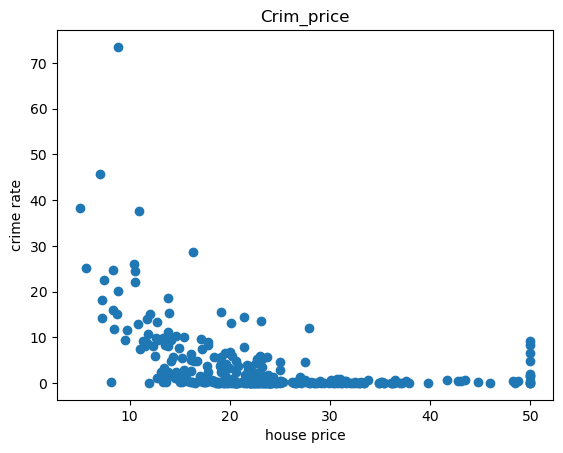

In [138]:
# 犯罪相關性
x = labels # 房價數據
y = train_data["crim"] # 犯罪率數據

plt.title("Crim_price")
plt.scatter(x, y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("crime rate") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

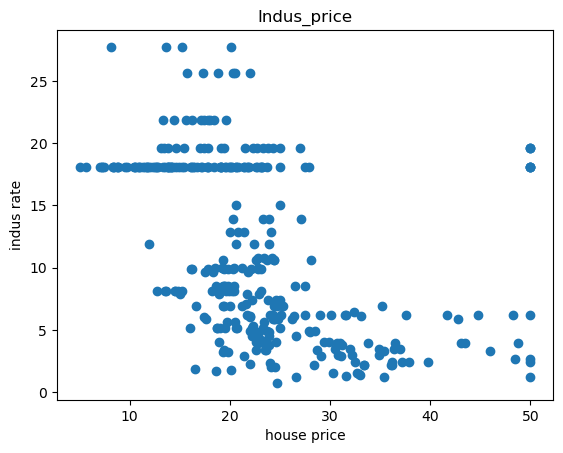

In [139]:
# 非商用土地比例相關性
x = labels # 房價數據
y = train_data["indus"]

plt.title("Indus_price")
plt.scatter(x, y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("indus rate") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

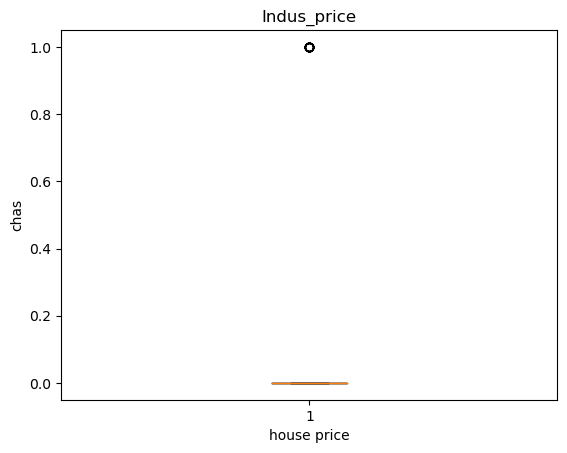

In [140]:
# 是否為河邊比例相關性
x = labels # 房價數據
y = train_data["chas"]

plt.title("Indus_price")
plt.boxplot(y)
plt.xlabel("house price") # x軸的標題
plt.ylabel("chas") # y軸的標題
 # 繪製散點圖
plt.show() # 顯示圖形

In [141]:
# from sklearn import preprocessing, linear_model
all_train_data.corr(method="pearson")
# 拿掉相關性小於 +- 0.4
mr_train_data = train_data.drop(columns=['ID','zn','chas','age','dis','rad','black'])
mr_test_data = test_data.drop(columns=['ID','zn','chas','age','dis','rad','black'])
print(mr_train_data.columns)
print(mr_test_data.columns)

Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat'], dtype='object')
Index(['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat'], dtype='object')


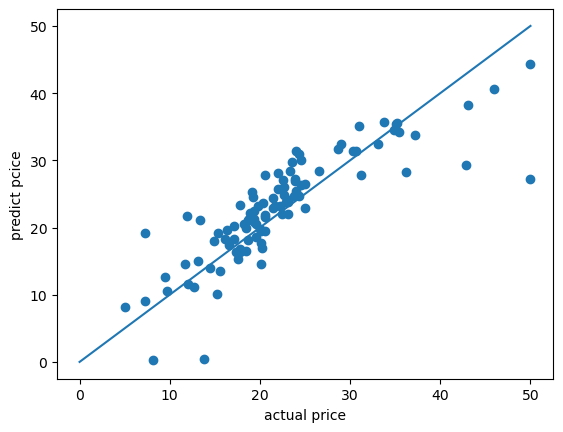

0.7415070971672502


In [142]:
# Degree1_LinearRegression
x = train_data
y = labels # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果
print(lnregr.score(x_train, y_train))

In [143]:
def out_file(predictions, filename):
    print('\n===============================================')
    print(f'Writing predictions to --> {filename}')
    ans_data = test_data.iloc[:,[0]]
    predictions= pd.DataFrame(predictions,columns=['medv'])
    ans_data = ans_data.join(predictions)
    ans_data.to_csv(filename,index= False)
    print('===============================================')

In [144]:
#使用 選擇過的 mr_train_data
# x = mr_train_data
# y = labels # 房價數據
#
#
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
# lnregr = LinearRegression()
#
# for i in range(1,4):
#     # Train_polynomial
#     poly_fea_extractor = preprocessing.PolynomialFeatures(degree= i)
#     x_train = poly_fea_extractor.fit_transform(x_train)
#
#     #Test_data_predict
#     x_test = poly_fea_extractor.transform(x_test)
#
#
#     lnregr.fit(x_train, y_train) # 將資料拿去訓練
#     y_predict = lnregr.predict(x_test) # test的資料用訓練出來的模型去預測
#
#     print(f'Degree_{i} = {lnregr.score(x_train, y_train)}')
#     print(f'Degree_{i}= {metrics.mean_squared_error(y_test, y_predict)}')

In [145]:
# Degree2 較佳
x = mr_train_data
y = labels
a = mr_test_data


linerregression = preprocessing.PolynomialFeatures(degree= 2)
x_train = linerregression.fit_transform(x)

lnregr.fit(x, y) # 將資料拿去訓練

y_predict = lnregr.predict(a) # test的資料用訓練出來的模型去預測
# print(y_predict)
out_file(y_predict, "linearregression_degree2_mr_data.csv")



Writing predictions to --> linearregression_degree2_mr_data.csv
          medv
0    32.547385
1    27.289817
2    20.668312
3    11.505291
4    21.200993
..         ...
168  16.139340
169  12.673381
170  20.627288
171  19.780532
172  26.919739

[173 rows x 1 columns]
      ID       medv
0      3  32.547385
1      6  27.289817
2      8  20.668312
3      9  11.505291
4     10  21.200993
..   ...        ...
168  496  16.139340
169  497  12.673381
170  499  20.627288
171  501  19.780532
172  505  26.919739

[173 rows x 2 columns]


In [148]:
# 使用全部數據

x = train_data
y = labels
a = test_data


linerregression = preprocessing.PolynomialFeatures(degree= 2)
x_train = linerregression.fit_transform(x)

lnregr.fit(x, y) # 將資料拿去訓練

y_predict = lnregr.predict(a) # test的資料用訓練出來的模型去預測
# print(y_predict)
out_file(y_predict, "linearregression_degree2_data.csv")


Writing predictions to --> linearregression_degree2_data.csv
          medv
0    31.279474
1    25.644671
2    18.669399
3     9.704693
4    18.187768
..         ...
168  15.675309
169  12.071867
170  20.149564
171  19.043789
172  25.099190

[173 rows x 1 columns]
      ID       medv
0      3  31.279474
1      6  25.644671
2      8  18.669399
3      9   9.704693
4     10  18.187768
..   ...        ...
168  496  15.675309
169  497  12.071867
170  499  20.149564
171  501  19.043789
172  505  25.099190

[173 rows x 2 columns]


In [150]:
#使用 選擇過的 mr_train_data
from sklearn.linear_model import ridge_regression
x = mr_train_data
y = labels # 房價數據


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
alpha_num = [0.1,0.05,0.01,0.001]
for i in range(1,4):
    for j in alpha_num:
        ridge = ridge_regression(alpha= j)
        # Train_polynomial
        poly_fea_extractor = preprocessing.PolynomialFeatures(degree= i)
        x_train = poly_fea_extractor.fit_transform(x_train)

        #Test_data_predict
        x_test = poly_fea_extractor.transform(x_test)


        ridge.fit(x_train, y_train) # 將資料拿去訓練
        y_predict = ridge.predict(x_test) # test的資料用訓練出來的模型去預測

        print(f'Degree_{ij} = {lnregr.score(x_train, y_train)}')
        print(f'Degree_{ij}= {metrics.mean_squared_error(y_test, y_predict)}')

TypeError: ridge_regression() missing 2 required positional arguments: 'X' and 'y'